# FOREIGN CURRENCY KAGGLE PROJECT

## PHASE 1: PROJECT SETUP

Import the necessary libraries needed for ETL, engineering, and export efforts

In [1]:
import pandas as pd
import csv
import random
import sqlite3
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import getpass as gp

from shapely.geometry import Point, Polygon

Function declaration

In [2]:
def function_1():
    '''
    DESCRIPTION: Sample description for the function
    '''

In [3]:
def function_2():
    '''
    DESCRIPTION: Sample description for the function
    '''

In [4]:
# set the random seed for the project in order to ensure consistent results
random.seed(6)

## PHASE 2: DATA ETL

## listings_2.csv Import

In [131]:
# import listings-2.csv into pandas dataframe
raw_df = pd.read_csv("data/Foreign_Exchange_Rates.csv") 
raw_df.head(15)

Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0            0  2000-01-03                            1.5172   
1            1  2000-01-04                            1.5239   
2            2  2000-01-05                            1.5267   
3            3  2000-01-06                            1.5291   
4            4  2000-01-07                            1.5272   
5            5  2000-01-10                            1.5242   
6            6  2000-01-11                            1.5209   
7            7  2000-01-12                            1.5202   
8            8  2000-01-13                            1.4954   
9            9  2000-01-14                            1.5004   
10          10  2000-01-17                                ND   
11          11  2000-01-18                             1.506   
12          12  2000-01-19                            1.5074   
13          13  2000-01-20                            1.5002   
14          14  2000-01-21                            1.5103   

   EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                0.9847                              1.9033   
1                  0.97                              1.9238   
2                0.9676                              1.9339   
3                0.9686                              1.9436   
4                0.9714                               1.938   
5                0.9754                               1.935   
6                0.9688                              1.9365   
7                0.9727                              1.9286   
8                0.9737                              1.9084   
9                0.9874                              1.9186   
10                   ND                                  ND   
11                0.988                              1.9342   
12               0.9886                              1.9399   
13               0.9869                              1.9486   
14               0.9901                              1.9592   

   UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                     0.6146             1.805   
1                                     0.6109            1.8405   
2                                     0.6092             1.856   
3                                      0.607              1.84   
4                                     0.6104             1.831   
5                                     0.6107             1.819   
6                                     0.6068            1.8225   
7                                     0.6073             1.835   
8                                     0.6067             1.814   
9                                     0.6115             1.805   
10                                        ND                ND   
11                                    0.6105            1.7942   
12                                    0.6083             1.793   
13                                    0.6047            1.7785   
14                                    0.6059              1.78   

   CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
0                        1.4465           8.2798   
1                        1.4518           8.2799   
2                        1.4518           8.2798   
3                        1.4571           8.2797   
4                        1.4505           8.2794   
5                        1.4568           8.2794   
6                         1.457           8.2795   
7                         1.455           8.2796   
8                        1.4495           8.2798   
9                        1.4497           8.2797   
10                           ND               ND   
11                       1.4502           8.2793   
12                       1.4527           8.2797   
13                       1.4484           8.2794   
14                        1.442           8.2795   

   HONG KONG - HONG KONG DOLLAR/US$  ... SINGAPORE - SINGAPORE DOLLAR/US$  \
0  

In [6]:
raw_df.dtypes

Unnamed: 0                                    int64
Time Serie                                   object
AUSTRALIA - AUSTRALIAN DOLLAR/US$            object
EURO AREA - EURO/US$                         object
NEW ZEALAND - NEW ZELAND DOLLAR/US$          object
UNITED KINGDOM - UNITED KINGDOM POUND/US$    object
BRAZIL - REAL/US$                            object
CANADA - CANADIAN DOLLAR/US$                 object
CHINA - YUAN/US$                             object
HONG KONG - HONG KONG DOLLAR/US$             object
INDIA - INDIAN RUPEE/US$                     object
KOREA - WON/US$                              object
MEXICO - MEXICAN PESO/US$                    object
SOUTH AFRICA - RAND/US$                      object
SINGAPORE - SINGAPORE DOLLAR/US$             object
DENMARK - DANISH KRONE/US$                   object
JAPAN - YEN/US$                              object
MALAYSIA - RINGGIT/US$                       object
NORWAY - NORWEGIAN KRONE/US$                 object
SWEDEN - KRO

In [143]:
cond1 = raw_df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'] != 'ND'
cond2 = raw_df['INDIA - INDIAN RUPEE/US$'] != 'ND'
cond3 = raw_df['TAIWAN - NEW TAIWAN DOLLAR/US$'] != 'ND'

mod_df = raw_df[cond1 & cond2 & cond3]
mod_df.head(15)

Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0            0  2000-01-03                            1.5172   
1            1  2000-01-04                            1.5239   
2            2  2000-01-05                            1.5267   
3            3  2000-01-06                            1.5291   
4            4  2000-01-07                            1.5272   
5            5  2000-01-10                            1.5242   
6            6  2000-01-11                            1.5209   
7            7  2000-01-12                            1.5202   
8            8  2000-01-13                            1.4954   
9            9  2000-01-14                            1.5004   
11          11  2000-01-18                             1.506   
12          12  2000-01-19                            1.5074   
13          13  2000-01-20                            1.5002   
14          14  2000-01-21                            1.5103   
15          15  2000-01-24                            1.5281   

   EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                0.9847                              1.9033   
1                  0.97                              1.9238   
2                0.9676                              1.9339   
3                0.9686                              1.9436   
4                0.9714                               1.938   
5                0.9754                               1.935   
6                0.9688                              1.9365   
7                0.9727                              1.9286   
8                0.9737                              1.9084   
9                0.9874                              1.9186   
11                0.988                              1.9342   
12               0.9886                              1.9399   
13               0.9869                              1.9486   
14               0.9901                              1.9592   
15               0.9981                              1.9759   

   UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                     0.6146             1.805   
1                                     0.6109            1.8405   
2                                     0.6092             1.856   
3                                      0.607              1.84   
4                                     0.6104             1.831   
5                                     0.6107             1.819   
6                                     0.6068            1.8225   
7                                     0.6073             1.835   
8                                     0.6067             1.814   
9                                     0.6115             1.805   
11                                    0.6105            1.7942   
12                                    0.6083             1.793   
13                                    0.6047            1.7785   
14                                    0.6059              1.78   
15                                    0.6053             1.768   

   CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
0                        1.4465           8.2798   
1                        1.4518           8.2799   
2                        1.4518           8.2798   
3                        1.4571           8.2797   
4                        1.4505           8.2794   
5                        1.4568           8.2794   
6                         1.457           8.2795   
7                         1.455           8.2796   
8                        1.4495           8.2798   
9                        1.4497           8.2797   
11                       1.4502           8.2793   
12                       1.4527           8.2797   
13                       1.4484           8.2794   
14                        1.442           8.2795   
15                         1.44           8.2789   

   HONG KONG - HONG KONG DOLLAR/US$  ... SINGAPORE - SINGAPORE DOLLAR/US$  \
0  

In [144]:
df = mod_df.iloc[:,2:].apply(pd.to_numeric)
df.dtypes

AUSTRALIA - AUSTRALIAN DOLLAR/US$            float64
EURO AREA - EURO/US$                         float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$          float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$    float64
BRAZIL - REAL/US$                            float64
CANADA - CANADIAN DOLLAR/US$                 float64
CHINA - YUAN/US$                             float64
HONG KONG - HONG KONG DOLLAR/US$             float64
INDIA - INDIAN RUPEE/US$                     float64
KOREA - WON/US$                              float64
MEXICO - MEXICAN PESO/US$                    float64
SOUTH AFRICA - RAND/US$                      float64
SINGAPORE - SINGAPORE DOLLAR/US$             float64
DENMARK - DANISH KRONE/US$                   float64
JAPAN - YEN/US$                              float64
MALAYSIA - RINGGIT/US$                       float64
NORWAY - NORWEGIAN KRONE/US$                 float64
SWEDEN - KRONA/US$                           float64
SRI LANKA - SRI LANKAN RUPEE/US$             f

In [125]:
mod_df['Time Serie'] = mod_df['Time Serie'].astype('datetime64[ns]')

/Users/patrickbenitez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unnamed: 0 Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0              0 2000-01-03                            1.5172   
1              1 2000-01-04                            1.5239   
2              2 2000-01-05                            1.5267   
3              3 2000-01-06                            1.5291   
4              4 2000-01-07                            1.5272   
...          ...        ...                               ...   
5211        5211 2019-12-24                            1.4445   
5213        5213 2019-12-26                            1.4411   
5214        5214 2019-12-27                            1.4331   
5215        5215 2019-12-30                            1.4278   
5216        5216 2019-12-31                            1.4225   

     EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                  0.9847                              1.9033   
1                    0.97                              1.9238   
2                  0.9676                              1.9339   
3                  0.9686                              1.9436   
4                  0.9714                               1.938   
...                   ...                                 ...   
5211               0.9022                              1.5058   
5213               0.9007                              1.5002   
5214               0.8949                              1.4919   
5215               0.8915                              1.4846   
5216               0.8907                              1.4826   

     UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                       0.6146             1.805   
1                                       0.6109            1.8405   
2                                       0.6092             1.856   
3                                        0.607              1.84   
4                                       0.6104             1.831   
...                                        ...               ...   
5211                                    0.7719            4.0833   
5213                                    0.7688            4.0602   
5214                                    0.7639            4.0507   
5215                                     0.761            4.0152   
5216                                    0.7536             4.019   

     CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
0                          1.4465           8.2798   
1                          1.4518           8.2799   
2                          1.4518           8.2798   
3                          1.4571           8.2797   
4                          1.4505           8.2794   
...                           ...              ...   
5211                        1.316           7.0064   
5213                       1.3124           6.9949   
5214                       1.3073           6.9954   
5215                       1.3058           6.9864   
5216                       1.2962           6.9618   

     HONG KONG - HONG KONG DOLLAR/US$  ... SINGAPORE - SINGAPORE DOLLAR/US$  \
0                              7.7765  ...                           1.6563   
1                              7.7775  ...                           1.6535   
2                               7.778  ...                            1.656   
3                              7.7785  ...                           1.6655   
4                              7.7783  ...                           1.6625   
...                               ...  ...                              ...   
5211                           7.7872  ...                            1.355   
5213                            7.788  ...                            1.354   
5214                           7.7874  ...                            1.352   
5215                           7.7857  ...                           1.3483   
5216                           7.7894  ...                           1.3446   

     DENMARK - DANISH KRONE/U

In [151]:

convert_dict = {'AUSTRALIA - AUSTRALIAN DOLLAR/US$': float,
                'EURO AREA - EURO/US$': float,
                'NEW ZEALAND - NEW ZELAND DOLLAR/US$': float, 
                'UNITED KINGDOM - UNITED KINGDOM POUND/US$': float,
                'BRAZIL - REAL/US$': float,                        
                'CANADA - CANADIAN DOLLAR/US$': float,             
                'CHINA - YUAN/US$': float,                         
                'HONG KONG - HONG KONG DOLLAR/US$': float,         
                'INDIA - INDIAN RUPEE/US$': float,                 
                'KOREA - WON/US$': float,                          
                'MEXICO - MEXICAN PESO/US$': float,                
                'SOUTH AFRICA - RAND/US$': float,                  
                'SINGAPORE - SINGAPORE DOLLAR/US$': float,         
                'DENMARK - DANISH KRONE/US$': float,               
                'JAPAN - YEN/US$': float,                          
                'MALAYSIA - RINGGIT/US$': float,                   
                'NORWAY - NORWEGIAN KRONE/US$': float,             
                'SWEDEN - KRONA/US$': float,                       
                'SRI LANKA - SRI LANKAN RUPEE/US$': float,         
                'SWITZERLAND - FRANC/US$': float,                  
                'TAIWAN - NEW TAIWAN DOLLAR/US$': float,           
                'THAILAND - BAHT/US$': float                      
               } 


mod_df = mod_df.astype(convert_dict) 
print(mod_df.dtypes)


Unnamed: 0                                     int64
Time Serie                                    object
AUSTRALIA - AUSTRALIAN DOLLAR/US$            float64
EURO AREA - EURO/US$                         float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$          float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$    float64
BRAZIL - REAL/US$                            float64
CANADA - CANADIAN DOLLAR/US$                 float64
CHINA - YUAN/US$                             float64
HONG KONG - HONG KONG DOLLAR/US$             float64
INDIA - INDIAN RUPEE/US$                     float64
KOREA - WON/US$                              float64
MEXICO - MEXICAN PESO/US$                    float64
SOUTH AFRICA - RAND/US$                      float64
SINGAPORE - SINGAPORE DOLLAR/US$             float64
DENMARK - DANISH KRONE/US$                   float64
JAPAN - YEN/US$                              float64
MALAYSIA - RINGGIT/US$                       float64
NORWAY - NORWEGIAN KRONE/US$                 f

In [10]:
# create a list of column names
col_list = list(raw_df.columns)
col_list

['Unnamed: 0',
 'Time Serie',
 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
 'EURO AREA - EURO/US$',
 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
 'BRAZIL - REAL/US$',
 'CANADA - CANADIAN DOLLAR/US$',
 'CHINA - YUAN/US$',
 'HONG KONG - HONG KONG DOLLAR/US$',
 'INDIA - INDIAN RUPEE/US$',
 'KOREA - WON/US$',
 'MEXICO - MEXICAN PESO/US$',
 'SOUTH AFRICA - RAND/US$',
 'SINGAPORE - SINGAPORE DOLLAR/US$',
 'DENMARK - DANISH KRONE/US$',
 'JAPAN - YEN/US$',
 'MALAYSIA - RINGGIT/US$',
 'NORWAY - NORWEGIAN KRONE/US$',
 'SWEDEN - KRONA/US$',
 'SRI LANKA - SRI LANKAN RUPEE/US$',
 'SWITZERLAND - FRANC/US$',
 'TAIWAN - NEW TAIWAN DOLLAR/US$',
 'THAILAND - BAHT/US$']

In [11]:
mod_df = mod_df.drop(columns=['Unnamed: 0'])
mod_df

Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$ EURO AREA - EURO/US$  \
0    2000-01-03                             1.5172               0.9847   
1    2000-01-04                             1.5239                 0.97   
2    2000-01-05                             1.5267               0.9676   
3    2000-01-06                             1.5291               0.9686   
4    2000-01-07                             1.5272               0.9714   
...         ...                                ...                  ...   
5211 2019-12-24                             1.4445               0.9022   
5213 2019-12-26                             1.4411               0.9007   
5214 2019-12-27                             1.4331               0.8949   
5215 2019-12-30                             1.4278               0.8915   
5216 2019-12-31                             1.4225               0.8907   

     NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                                 1.9033   
1                                 1.9238   
2                                 1.9339   
3                                 1.9436   
4                                  1.938   
...                                  ...   
5211                              1.5058   
5213                              1.5002   
5214                              1.4919   
5215                              1.4846   
5216                              1.4826   

     UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                       0.6146             1.805   
1                                       0.6109            1.8405   
2                                       0.6092             1.856   
3                                        0.607              1.84   
4                                       0.6104             1.831   
...                                        ...               ...   
5211                                    0.7719            4.0833   
5213                                    0.7688            4.0602   
5214                                    0.7639            4.0507   
5215                                     0.761            4.0152   
5216                                    0.7536             4.019   

     CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
0                          1.4465           8.2798   
1                          1.4518           8.2799   
2                          1.4518           8.2798   
3                          1.4571           8.2797   
4                          1.4505           8.2794   
...                           ...              ...   
5211                        1.316           7.0064   
5213                       1.3124           6.9949   
5214                       1.3073           6.9954   
5215                       1.3058           6.9864   
5216                       1.2962           6.9618   

     HONG KONG - HONG KONG DOLLAR/US$ INDIA - INDIAN RUPEE/US$  ...  \
0                              7.7765                    43.55  ...   
1                              7.7775                    43.55  ...   
2                               7.778                    43.55  ...   
3                              7.7785                    43.55  ...   
4                              7.7783                    43.55  ...   
...                               ...                      ...  ...   
5211                           7.7872                    71.23  ...   
5213                            7.788                    71.28  ...   
5214                           7.7874                    71.45  ...   
5215                           7.7857                     71.3  ...   
5216                           7.7894                    71.36  ...   

     SINGAPORE - SINGAPORE DOLLAR/US$ DENMARK - DANISH KRONE/US$  \
0                              1.6563                      7.329   
1                              1.6535                      7.218   
2                               1.656               

In [128]:
mod_df.head(20)

Unnamed: 0 Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0            0 2000-01-03                            1.5172   
1            1 2000-01-04                            1.5239   
2            2 2000-01-05                            1.5267   
3            3 2000-01-06                            1.5291   
4            4 2000-01-07                            1.5272   
5            5 2000-01-10                            1.5242   
6            6 2000-01-11                            1.5209   
7            7 2000-01-12                            1.5202   
8            8 2000-01-13                            1.4954   
9            9 2000-01-14                            1.5004   
11          11 2000-01-18                             1.506   
12          12 2000-01-19                            1.5074   
13          13 2000-01-20                            1.5002   
14          14 2000-01-21                            1.5103   
15          15 2000-01-24                            1.5281   
16          16 2000-01-25                            1.5286   
17          17 2000-01-26                            1.5373   
18          18 2000-01-27                            1.5267   
19          19 2000-01-28                            1.5962   
20          20 2000-01-31                            1.5669   

   EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                0.9847                              1.9033   
1                  0.97                              1.9238   
2                0.9676                              1.9339   
3                0.9686                              1.9436   
4                0.9714                               1.938   
5                0.9754                               1.935   
6                0.9688                              1.9365   
7                0.9727                              1.9286   
8                0.9737                              1.9084   
9                0.9874                              1.9186   
11                0.988                              1.9342   
12               0.9886                              1.9399   
13               0.9869                              1.9486   
14               0.9901                              1.9592   
15               0.9981                              1.9759   
16               0.9959                              1.9732   
17               0.9989                              1.9763   
18               1.0111                              1.9716   
19               1.0241                              2.0534   
20               1.0249                               2.019   

   UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                     0.6146             1.805   
1                                     0.6109            1.8405   
2                                     0.6092             1.856   
3                                      0.607              1.84   
4                                     0.6104             1.831   
5                                     0.6107             1.819   
6                                     0.6068            1.8225   
7                                     0.6073             1.835   
8                                     0.6067             1.814   
9                                     0.6115             1.805   
11                                    0.6105            1.7942   
12                                    0.6083             1.793   
13                                    0.6047            1.7785   
14                                    0.6059              1.78   
15                                    0.6053             1.768   
16                                    0.6067              1.78   
17                                    0.6099             1.781   
18                                    0.6111              1.78   
19                                    0.6169              1.79   
20                                  

## Timeseries Plotting

In [14]:
mod_df

Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$ EURO AREA - EURO/US$  \
0    2000-01-03                             1.5172               0.9847   
1    2000-01-04                             1.5239                 0.97   
2    2000-01-05                             1.5267               0.9676   
3    2000-01-06                             1.5291               0.9686   
4    2000-01-07                             1.5272               0.9714   
...         ...                                ...                  ...   
5211 2019-12-24                             1.4445               0.9022   
5213 2019-12-26                             1.4411               0.9007   
5214 2019-12-27                             1.4331               0.8949   
5215 2019-12-30                             1.4278               0.8915   
5216 2019-12-31                             1.4225               0.8907   

     NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                                 1.9033   
1                                 1.9238   
2                                 1.9339   
3                                 1.9436   
4                                  1.938   
...                                  ...   
5211                              1.5058   
5213                              1.5002   
5214                              1.4919   
5215                              1.4846   
5216                              1.4826   

     UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                       0.6146             1.805   
1                                       0.6109            1.8405   
2                                       0.6092             1.856   
3                                        0.607              1.84   
4                                       0.6104             1.831   
...                                        ...               ...   
5211                                    0.7719            4.0833   
5213                                    0.7688            4.0602   
5214                                    0.7639            4.0507   
5215                                     0.761            4.0152   
5216                                    0.7536             4.019   

     CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
0                          1.4465           8.2798   
1                          1.4518           8.2799   
2                          1.4518           8.2798   
3                          1.4571           8.2797   
4                          1.4505           8.2794   
...                           ...              ...   
5211                        1.316           7.0064   
5213                       1.3124           6.9949   
5214                       1.3073           6.9954   
5215                       1.3058           6.9864   
5216                       1.2962           6.9618   

     HONG KONG - HONG KONG DOLLAR/US$ INDIA - INDIAN RUPEE/US$  ...  \
0                              7.7765                    43.55  ...   
1                              7.7775                    43.55  ...   
2                               7.778                    43.55  ...   
3                              7.7785                    43.55  ...   
4                              7.7783                    43.55  ...   
...                               ...                      ...  ...   
5211                           7.7872                    71.23  ...   
5213                            7.788                    71.28  ...   
5214                           7.7874                    71.45  ...   
5215                           7.7857                     71.3  ...   
5216                           7.7894                    71.36  ...   

     SINGAPORE - SINGAPORE DOLLAR/US$ DENMARK - DANISH KRONE/US$  \
0                              1.6563                      7.329   
1                              1.6535                      7.218   
2                               1.656               

In [101]:
# retrieve only the first day of the month record
first_day_mask = mod_df['Time Serie'].map(lambda x: x.day) == 1
first_day_df = mod_df[first_day_mask]
first_day_df

Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$ EURO AREA - EURO/US$  \
21   2000-02-01                             1.5835               1.0276   
42   2000-03-01                             1.6483               1.0309   
85   2000-05-01                             1.7241               1.0965   
108  2000-06-01                             1.7479               1.0745   
151  2000-08-01                             1.7227               1.0837   
...         ...                                ...                  ...   
5042 2019-05-01                             1.4209               0.8892   
5085 2019-07-01                             1.4362               0.8844   
5108 2019-08-01                             1.4582                0.904   
5151 2019-10-01                             1.4919               0.9147   
5174 2019-11-01                             1.4463               0.8953   

     NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
21                                2.0392   
42                                2.0606   
85                                2.0683   
108                               2.1925   
151                               2.1997   
...                                  ...   
5042                              1.5033   
5085                              1.4981   
5108                              1.5235   
5151                               1.601   
5174                              1.5516   

     UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
21                                      0.6192             1.795   
42                                       0.631             1.769   
85                                      0.6428             1.807   
108                                     0.6705             1.821   
151                                      0.667             1.786   
...                                        ...               ...   
5042                                    0.7639            3.9195   
5085                                    0.7909            3.8217   
5108                                    0.8234            3.8366   
5151                                    0.8169            4.1624   
5174                                    0.7722            3.9756   

     CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
21                         1.4468           8.2774   
42                          1.447           8.2786   
85                         1.4783           8.2799   
108                         1.491           8.2771   
151                        1.4892           8.2788   
...                           ...              ...   
5042                       1.3417           6.7319   
5085                       1.3124           6.8487   
5108                       1.3202           6.8972   
5151                       1.3235           7.1473   
5174                       1.3145           7.0368   

     HONG KONG - HONG KONG DOLLAR/US$ INDIA - INDIAN RUPEE/US$  ...  \
21                             7.7807                    43.62  ...   
42                             7.7824                    43.63  ...   
85                              7.789                    43.67  ...   
108                             7.792                    44.65  ...   
151                            7.7993                    45.15  ...   
...                               ...                      ...  ...   
5042                           7.8448                    69.52  ...   
5085                           7.8127                    68.87  ...   
5108                           7.8266                       69  ...   
5151                           7.8425                    71.11  ...   
5174                           7.8365                    70.76  ...   

     SINGAPORE - SINGAPORE DOLLAR/US$ DENMARK - DANISH KRONE/US$  \
21                              1.699                     7.6445   
42                             1.7182                      7.673   
85                              1.709               

In [16]:
# retrieve only the first day of the month record
aus_raw2 = mod_df[['Time Serie','AUSTRALIA - AUSTRALIAN DOLLAR/US$']]
# scatter plot showing average price and number of reviews
fig = px.line(aus_raw2, 
                 x= aus_raw2['Time Serie'],
                 y=aus_raw2['AUSTRALIA - AUSTRALIAN DOLLAR/US$'], 
                 title = "AUS Dollar Timeseries")
fig.show()

In [17]:
# EU Chart

# retrieve only the first day of the month record
eu_raw = mod_df[['Time Serie','EURO AREA - EURO/US$']]
# scatter plot showing average price and number of reviews
fig = px.line(eu_raw, 
                 x= eu_raw['Time Serie'],
                 y=eu_raw['EURO AREA - EURO/US$'], 
                 title = "EU Dollar Timeseries")
fig.show()

In [18]:
# create a list of currecy names
currency_list = list(mod_df.columns[1:])
currency_list

['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
 'EURO AREA - EURO/US$',
 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
 'BRAZIL - REAL/US$',
 'CANADA - CANADIAN DOLLAR/US$',
 'CHINA - YUAN/US$',
 'HONG KONG - HONG KONG DOLLAR/US$',
 'INDIA - INDIAN RUPEE/US$',
 'KOREA - WON/US$',
 'MEXICO - MEXICAN PESO/US$',
 'SOUTH AFRICA - RAND/US$',
 'SINGAPORE - SINGAPORE DOLLAR/US$',
 'DENMARK - DANISH KRONE/US$',
 'JAPAN - YEN/US$',
 'MALAYSIA - RINGGIT/US$',
 'NORWAY - NORWEGIAN KRONE/US$',
 'SWEDEN - KRONA/US$',
 'SRI LANKA - SRI LANKAN RUPEE/US$',
 'SWITZERLAND - FRANC/US$',
 'TAIWAN - NEW TAIWAN DOLLAR/US$',
 'THAILAND - BAHT/US$']

In [19]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

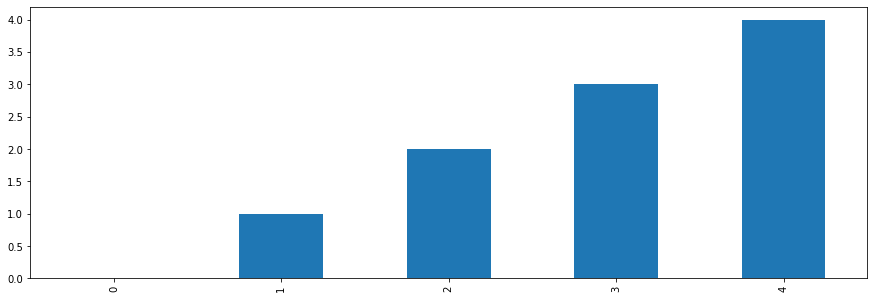

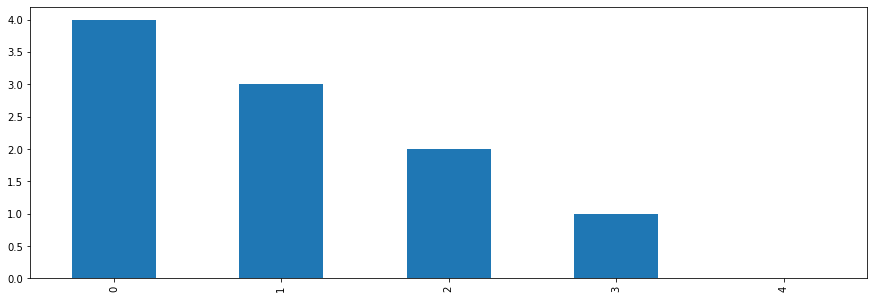

In [20]:
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline

ys = [[0,1,2,3,4],[4,3,2,1,0]]
x_ax = [0,1,2,3,4]

for y_ax in ys:
    ts = Series(y_ax,index=x_ax)
    ts.plot(kind='bar', figsize=(15,5))
    plt.show()

In [84]:
dataframe = pd.DataFrame(np.random.randint(0,10,size=(10, 4)), columns=range(4))
dataframe

0  1  2  3
0  0  5  2  4
1  3  6  2  0
2  2  0  4  2
3  3  2  6  8
4  6  7  0  6
5  6  1  9  7
6  5  6  0  3
7  0  1  1  9
8  4  0  9  7
9  2  4  1  5

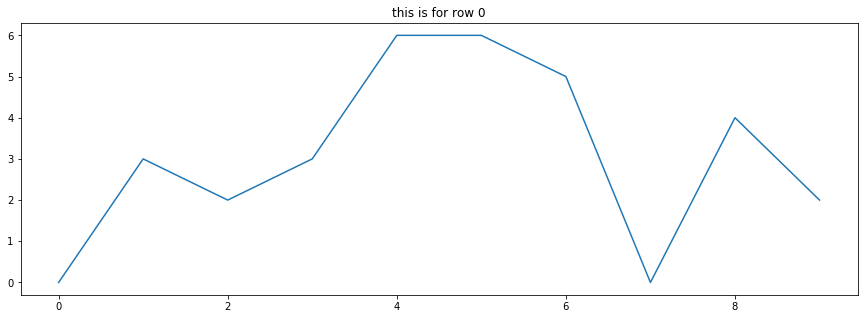

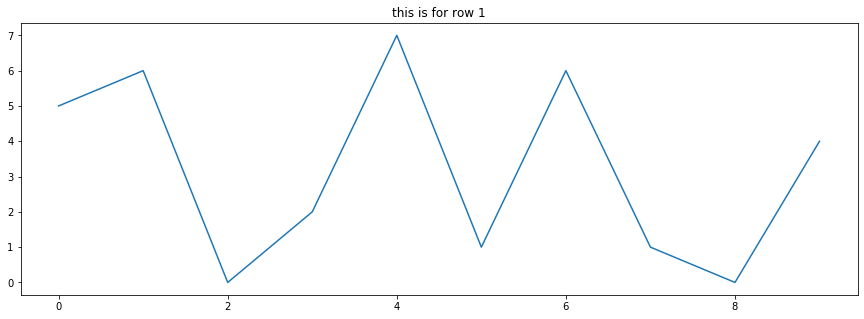

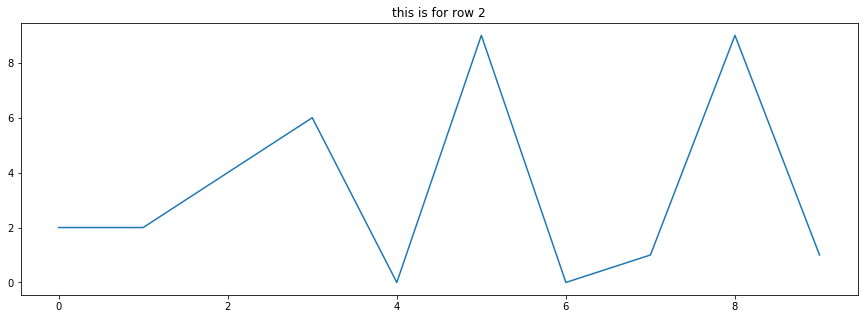

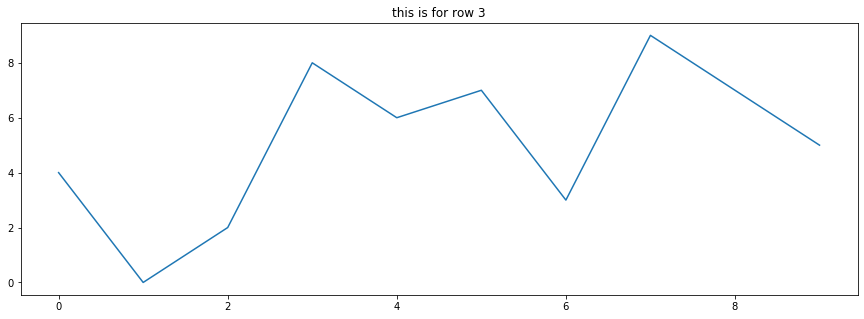

In [96]:
for q in range(dataframe.shape[1]):
    text = "this is for row " + str(q)
    plt.figure(figsize=(15,5))
    plt.title(text)
    plt.plot(dataframe.iloc[:,q])

In [103]:
first_day_df

Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$ EURO AREA - EURO/US$  \
21   2000-02-01                             1.5835               1.0276   
42   2000-03-01                             1.6483               1.0309   
85   2000-05-01                             1.7241               1.0965   
108  2000-06-01                             1.7479               1.0745   
151  2000-08-01                             1.7227               1.0837   
...         ...                                ...                  ...   
5042 2019-05-01                             1.4209               0.8892   
5085 2019-07-01                             1.4362               0.8844   
5108 2019-08-01                             1.4582                0.904   
5151 2019-10-01                             1.4919               0.9147   
5174 2019-11-01                             1.4463               0.8953   

     NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
21                                2.0392   
42                                2.0606   
85                                2.0683   
108                               2.1925   
151                               2.1997   
...                                  ...   
5042                              1.5033   
5085                              1.4981   
5108                              1.5235   
5151                               1.601   
5174                              1.5516   

     UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
21                                      0.6192             1.795   
42                                       0.631             1.769   
85                                      0.6428             1.807   
108                                     0.6705             1.821   
151                                      0.667             1.786   
...                                        ...               ...   
5042                                    0.7639            3.9195   
5085                                    0.7909            3.8217   
5108                                    0.8234            3.8366   
5151                                    0.8169            4.1624   
5174                                    0.7722            3.9756   

     CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
21                         1.4468           8.2774   
42                          1.447           8.2786   
85                         1.4783           8.2799   
108                         1.491           8.2771   
151                        1.4892           8.2788   
...                           ...              ...   
5042                       1.3417           6.7319   
5085                       1.3124           6.8487   
5108                       1.3202           6.8972   
5151                       1.3235           7.1473   
5174                       1.3145           7.0368   

     HONG KONG - HONG KONG DOLLAR/US$ INDIA - INDIAN RUPEE/US$  ...  \
21                             7.7807                    43.62  ...   
42                             7.7824                    43.63  ...   
85                              7.789                    43.67  ...   
108                             7.792                    44.65  ...   
151                            7.7993                    45.15  ...   
...                               ...                      ...  ...   
5042                           7.8448                    69.52  ...   
5085                           7.8127                    68.87  ...   
5108                           7.8266                       69  ...   
5151                           7.8425                    71.11  ...   
5174                           7.8365                    70.76  ...   

     SINGAPORE - SINGAPORE DOLLAR/US$ DENMARK - DANISH KRONE/US$  \
21                              1.699                     7.6445   
42                             1.7182                      7.673   
85                              1.709               

In [160]:
country = mod_df.drop('Unnamed: 0', 1)
country.dtypes

Time Serie                                    object
AUSTRALIA - AUSTRALIAN DOLLAR/US$            float64
EURO AREA - EURO/US$                         float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$          float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$    float64
BRAZIL - REAL/US$                            float64
CANADA - CANADIAN DOLLAR/US$                 float64
CHINA - YUAN/US$                             float64
HONG KONG - HONG KONG DOLLAR/US$             float64
INDIA - INDIAN RUPEE/US$                     float64
KOREA - WON/US$                              float64
MEXICO - MEXICAN PESO/US$                    float64
SOUTH AFRICA - RAND/US$                      float64
SINGAPORE - SINGAPORE DOLLAR/US$             float64
DENMARK - DANISH KRONE/US$                   float64
JAPAN - YEN/US$                              float64
MALAYSIA - RINGGIT/US$                       float64
NORWAY - NORWEGIAN KRONE/US$                 float64
SWEDEN - KRONA/US$                           f

In [161]:
country_df = country.iloc[:,1:]
country_df.dtypes

AUSTRALIA - AUSTRALIAN DOLLAR/US$            float64
EURO AREA - EURO/US$                         float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$          float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$    float64
BRAZIL - REAL/US$                            float64
CANADA - CANADIAN DOLLAR/US$                 float64
CHINA - YUAN/US$                             float64
HONG KONG - HONG KONG DOLLAR/US$             float64
INDIA - INDIAN RUPEE/US$                     float64
KOREA - WON/US$                              float64
MEXICO - MEXICAN PESO/US$                    float64
SOUTH AFRICA - RAND/US$                      float64
SINGAPORE - SINGAPORE DOLLAR/US$             float64
DENMARK - DANISH KRONE/US$                   float64
JAPAN - YEN/US$                              float64
MALAYSIA - RINGGIT/US$                       float64
NORWAY - NORWEGIAN KRONE/US$                 float64
SWEDEN - KRONA/US$                           float64
SRI LANKA - SRI LANKAN RUPEE/US$             f

/Users/patrickbenitez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



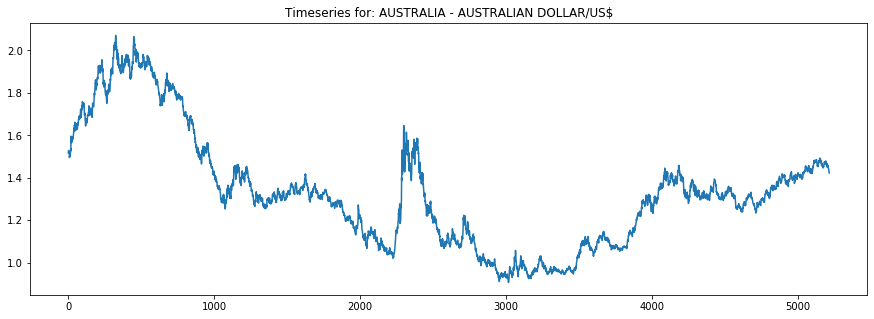

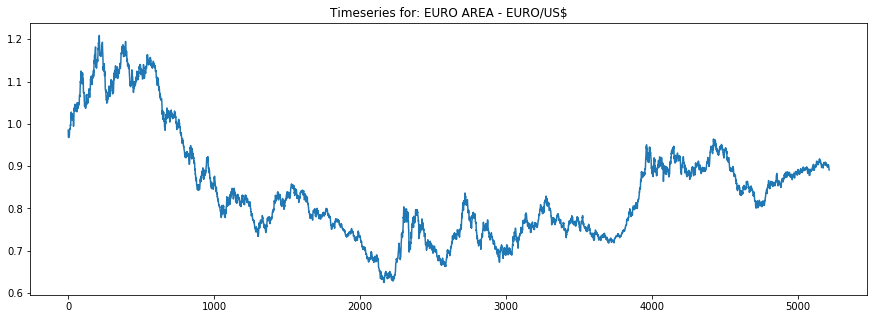

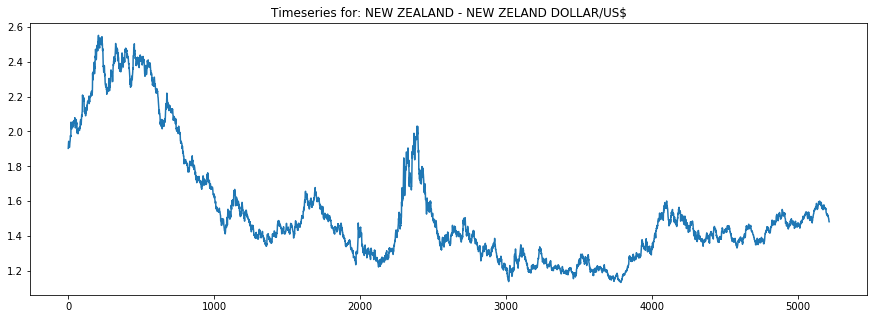

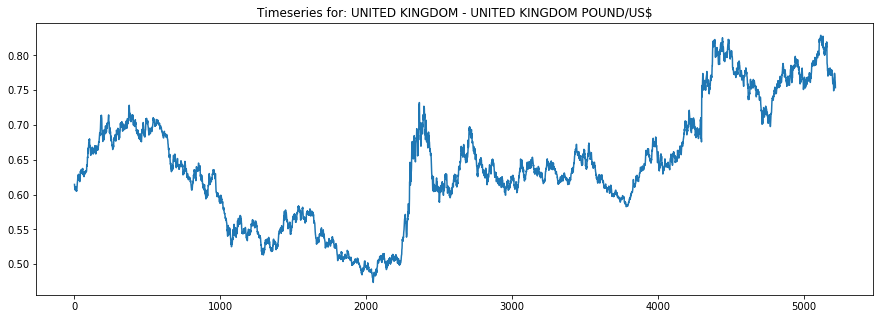

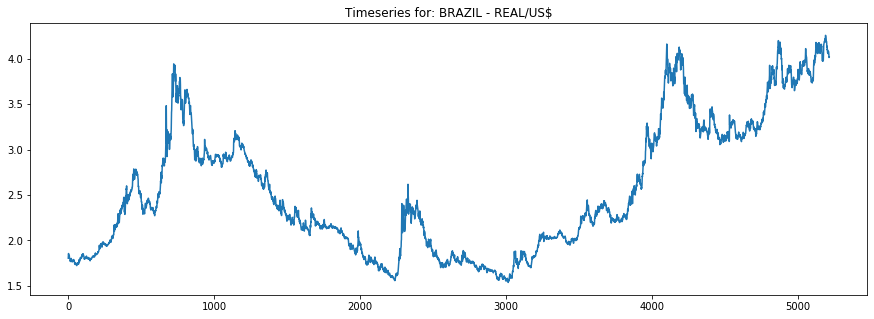

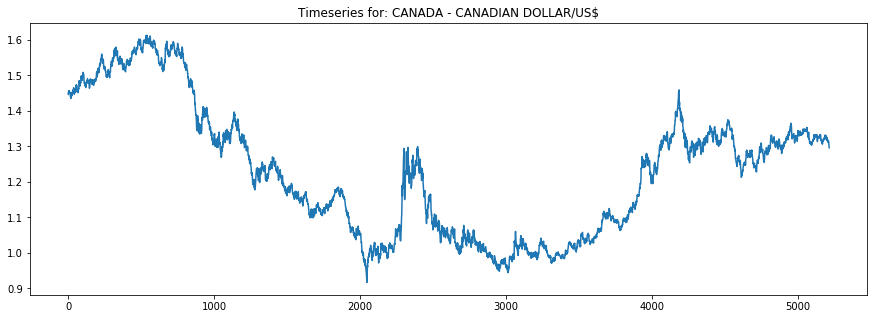

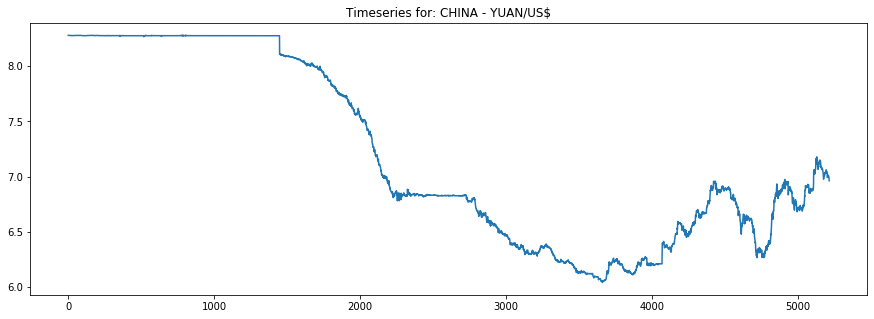

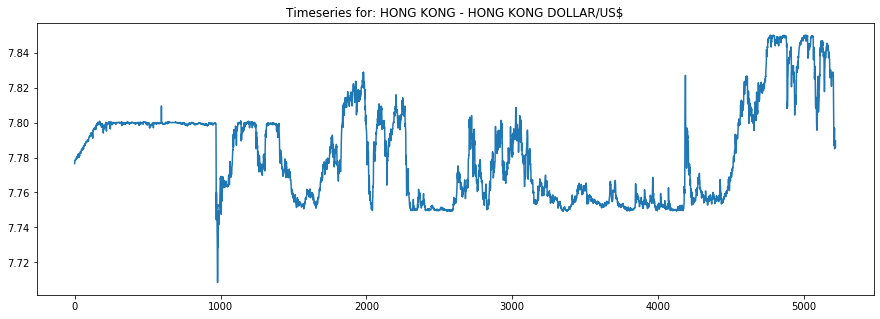

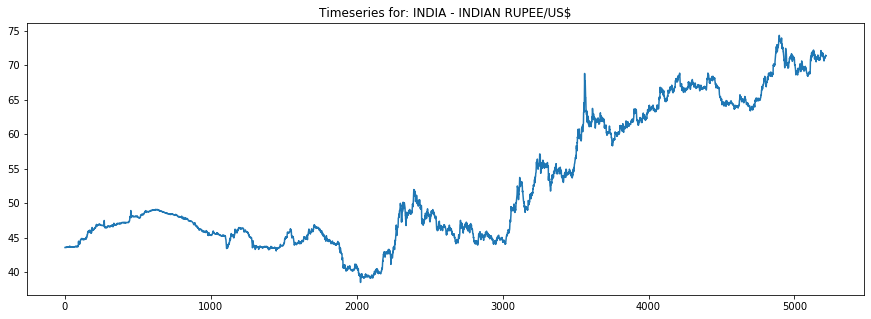

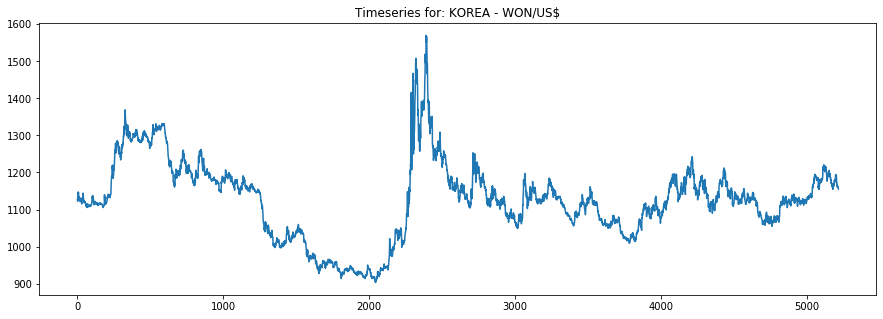

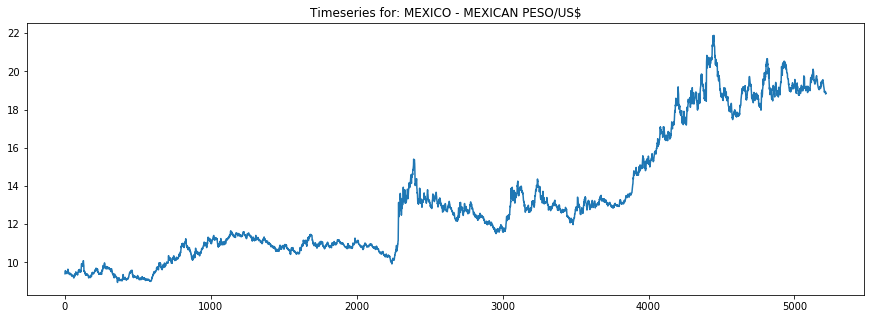

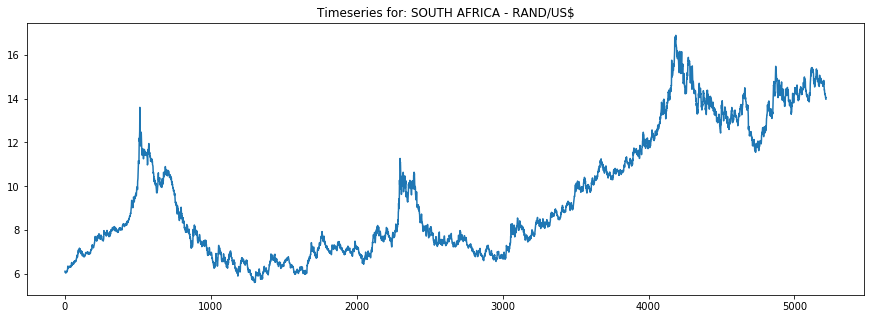

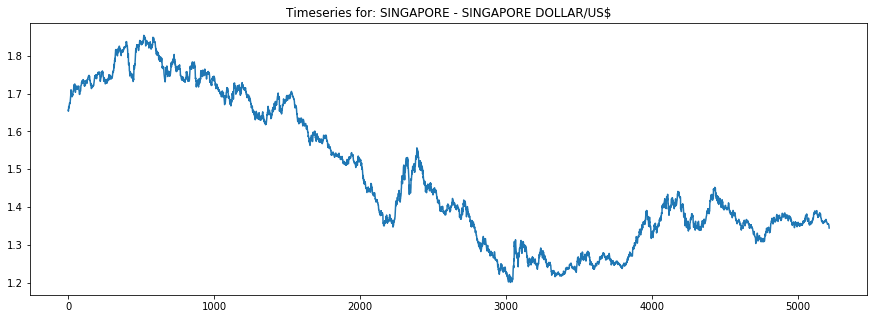

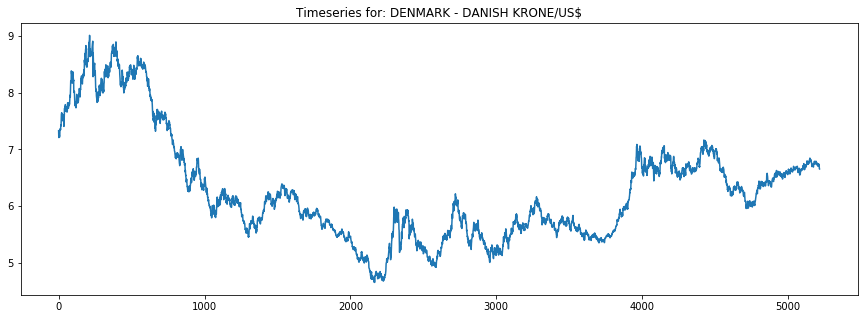

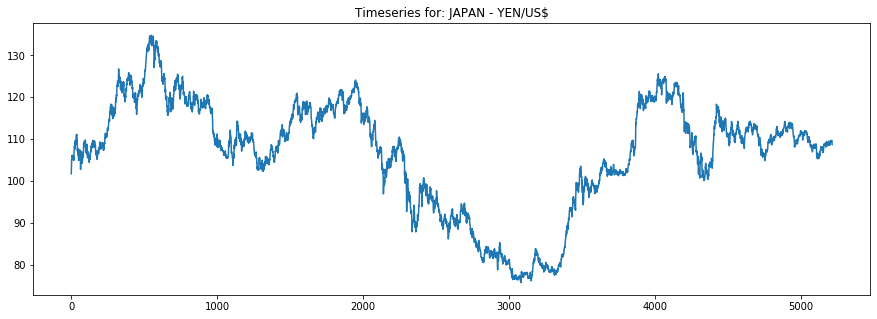

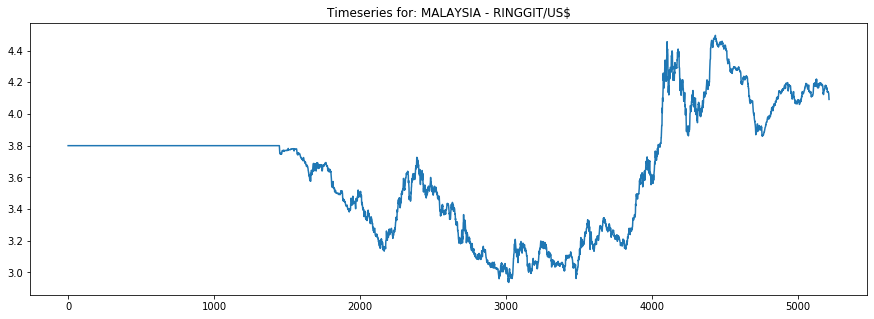

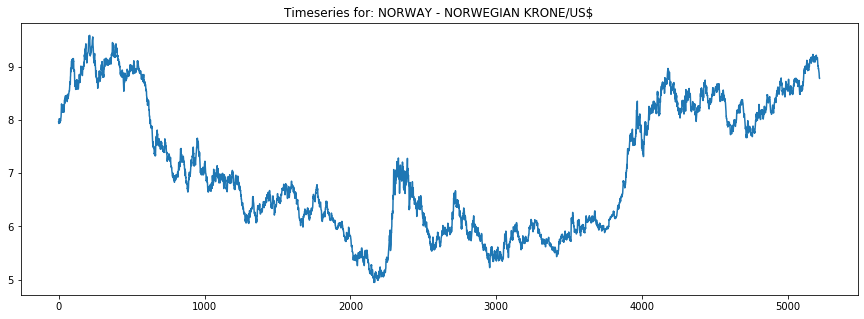

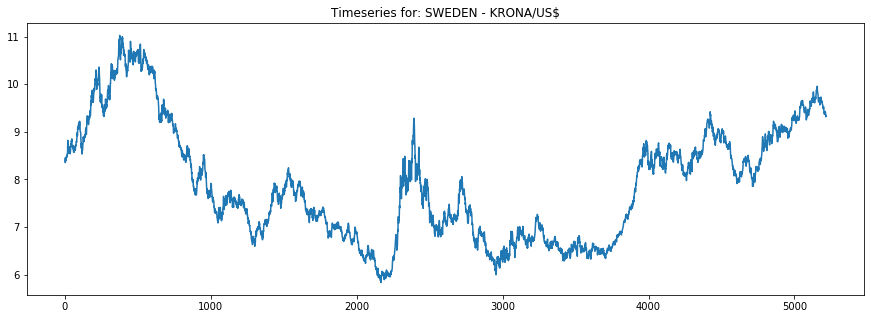

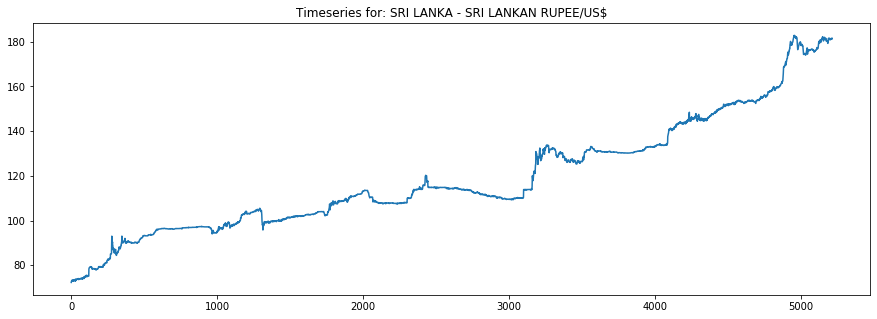

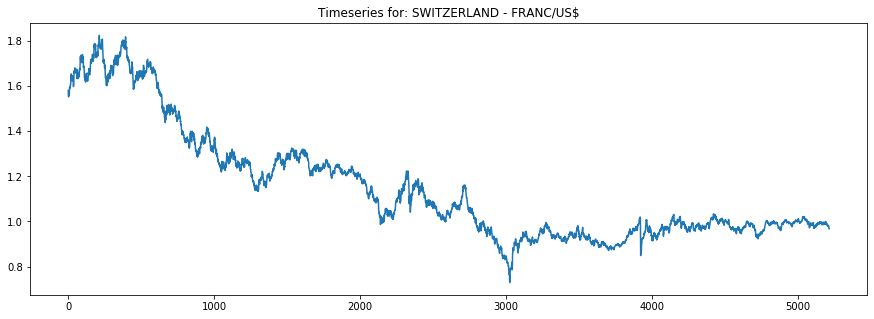

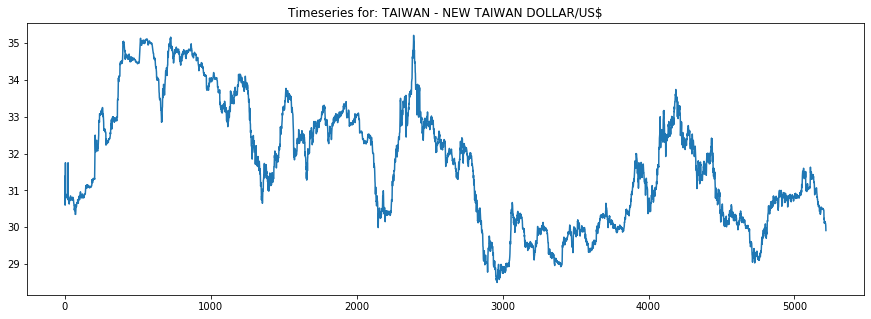

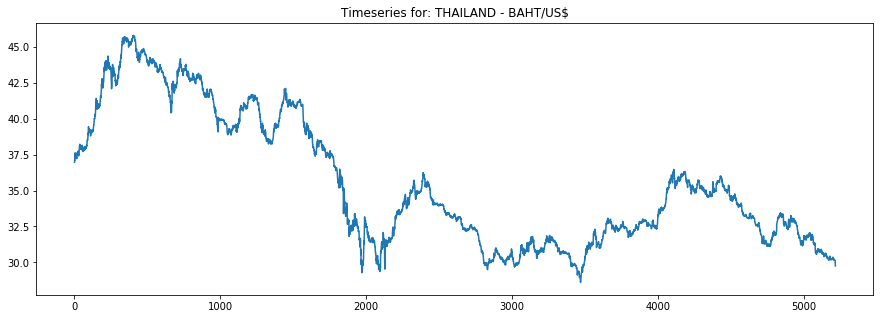

In [162]:
for q in range(country_df.shape[1]):
    plot_title = "Timeseries for: {}".format(currency_list[q]) 
    plt.figure(figsize=(15,5))
    plt.title(plot_title)
    plt.plot(country_df.iloc[:,q])

In [112]:
country_df.sort

AttributeError: 'DataFrame' object has no attribute 'sort'